Epoch 1/50


<ipython-input-3-2ffca1b29370>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4954 - loss: 0.7195 - val_accuracy: 0.4812 - val_loss: 0.7074
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5732 - loss: 0.6758 - val_accuracy: 0.4750 - val_loss: 0.7074
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6534 - loss: 0.6608 - val_accuracy: 0.4688 - val_loss: 0.7139
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6275 - loss: 0.6544 - val_accuracy: 0.4625 - val_loss: 0.7204
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6684 - loss: 0.6465 - val_accuracy: 0.4625 - val_loss: 0.7204
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7077 - loss: 0.6217 - val_accuracy: 0.4625 - val_loss: 0.7233
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7290 - loss: 0.6130 - val_accuracy: 0.4812 - val_loss: 0.7276
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7132 - loss: 0.6147 - val_accuracy: 0.4688 - val_loss: 0.7343
Ep

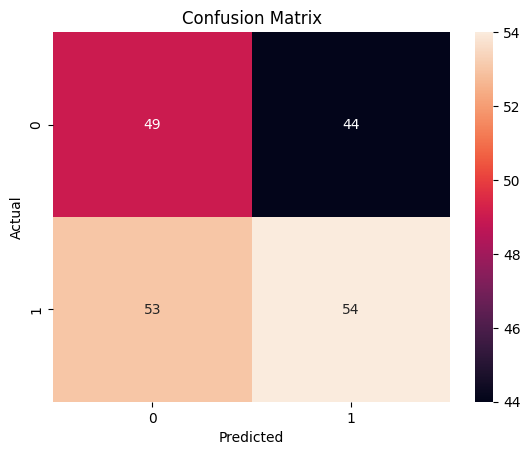

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.53      0.50        93
           1       0.55      0.50      0.53       107

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.52       200



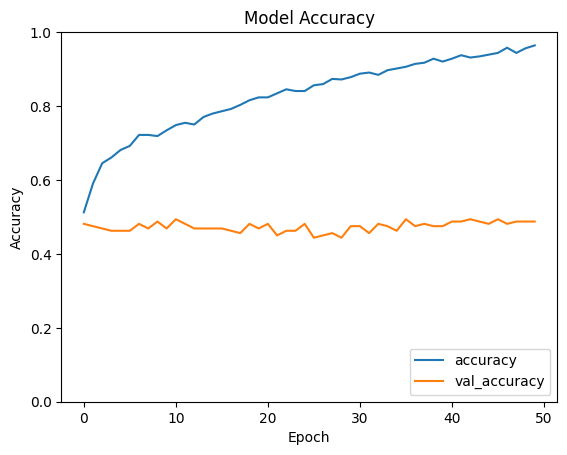

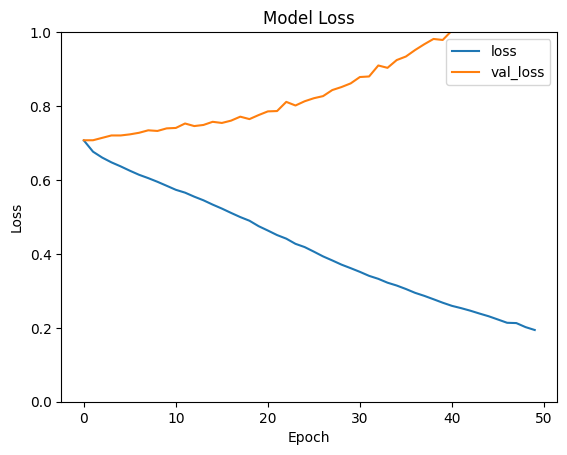

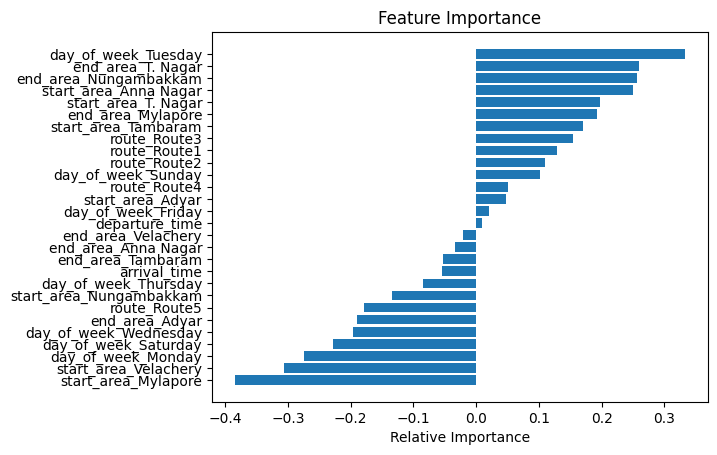

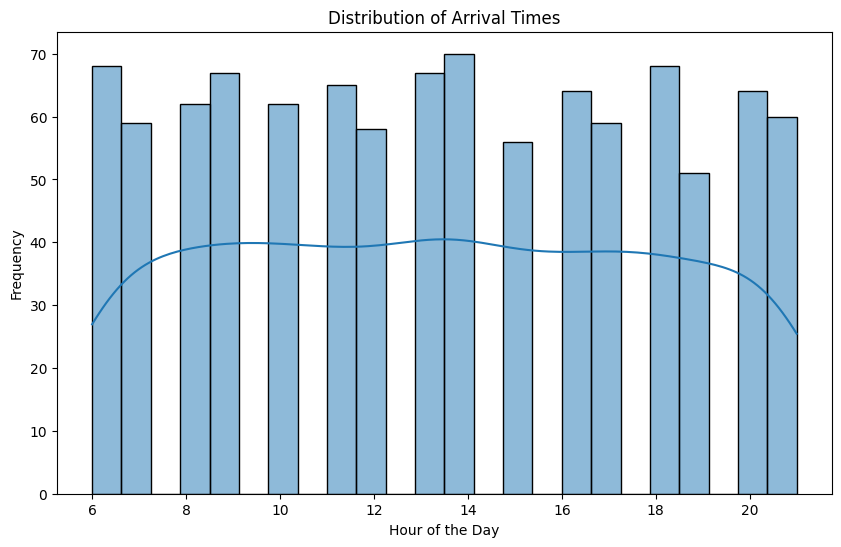

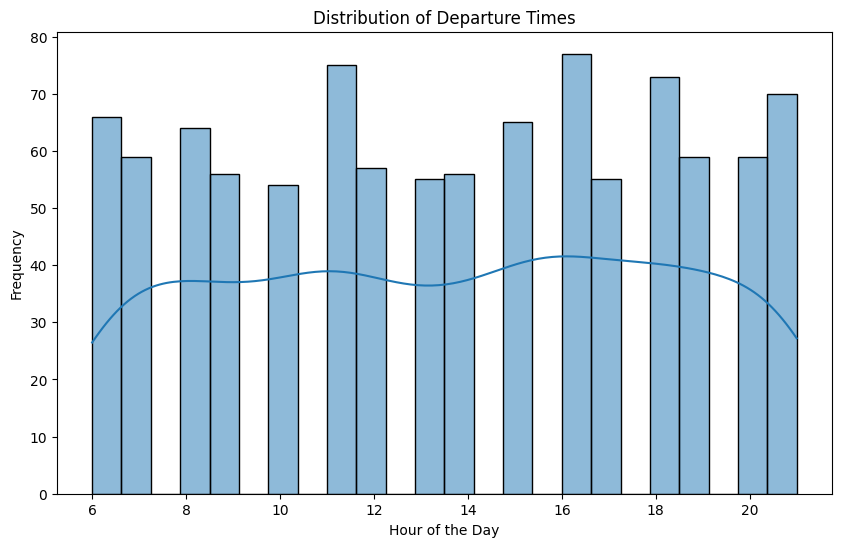

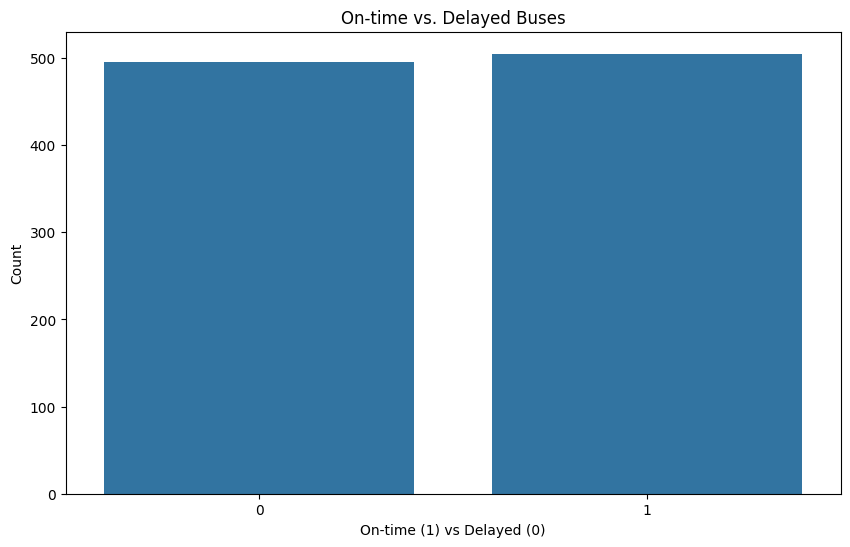

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the generated dataset
df = pd.read_csv('/content/chennai_bus_data.csv')

# Preprocess the data
df.fillna(method='ffill', inplace=True)
df = pd.get_dummies(df, columns=['route', 'day_of_week', 'start_area', 'end_area'])

# Encode time columns
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M').dt.hour
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M').dt.hour

# Split the data into features and target
X = df.drop('is_on_time', axis=1)
y = df['is_on_time']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the deep learning model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Plotting training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.show()

# Additional Plots
# Plot feature importance
importances = model.get_weights()[0]
indices = np.argsort(importances[:,0])
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices,0], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Plot arrival times
plt.figure(figsize=(10, 6))
sns.histplot(df['arrival_time'], bins=24, kde=True)
plt.title('Distribution of Arrival Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

# Plot departure times
plt.figure(figsize=(10, 6))
sns.histplot(df['departure_time'], bins=24, kde=True)
plt.title('Distribution of Departure Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

# Plot on-time vs. delayed buses
plt.figure(figsize=(10, 6))
sns.countplot(x='is_on_time', data=df)
plt.title('On-time vs. Delayed Buses')
plt.xlabel('On-time (1) vs Delayed (0)')
plt.ylabel('Count')
plt.show()

In [5]:
sample_index = 0  # Change this index to test different samples
sample_value = X_test[sample_index]
sample_original_value = y_test.iloc[sample_index]

sample_predicted_value = (model.predict(np.array([sample_value])) > 0.5).astype("int32")[0][0]

# Convert 0 and 1 to strings
original_value_str = "On Time" if sample_original_value == 1 else "Delayed"
predicted_value_str = "On Time" if sample_predicted_value == 1 else "Delayed"

print(f"Original Value: {original_value_str}")
print(f"Predicted Value: {predicted_value_str}")

# To display the row from the original dataframe
original_row = df.iloc[sample_index]
print("\nOriginal Data Row:")
print(original_row)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Original Value: Delayed
Predicted Value: Delayed

Original Data Row:
arrival_time                   8
departure_time                 9
is_on_time                     0
route_Route1               False
route_Route2               False
route_Route3               False
route_Route4                True
route_Route5               False
day_of_week_Friday         False
day_of_week_Monday         False
day_of_week_Saturday       False
day_of_week_Sunday         False
day_of_week_Thursday        True
day_of_week_Tuesday        False
day_of_week_Wednesday      False
start_area_Adyar           False
start_area_Anna Nagar       True
start_area_Mylapore        False
start_area_Nungambakkam    False
start_area_T. Nagar        False
start_area_Tambaram        False
start_area_Velachery       False
end_area_Adyar             False
end_area_Anna Nagar        False
end_area_Mylapore          False
end_area_Nungambakkam      False
end_area_T. Nagar          False
en